## 1) LIBRARY IMPORT AND SAS VIYA CONNECTION

In [1]:
import pandas as pd
import os
import swat
import matplotlib.pyplot as plt

In [3]:
os.environ['CAS_CLIENT_SSL_CA_LIST'] = '/opt/sas/viya/config/etc/SASSecurityCertificateFramework/cacerts/trustedcerts.pem'
cashost='frasepviya35smp.cloud.com'
casport=5570
s = swat.CAS(cashost, casport,"viyademo01","demopw")
s.sessionProp.setSessOpt(metrics="TRUE", timeout=1800, caslib='casuser', messageLevel="ALL")

NOTE: 'CASUSER(viyademo01)' is now the active caslib.
NOTE: Action 'sessionProp.setSessOpt' used (Total process time):
NOTE:       real time               0.000267 seconds
NOTE:       cpu time                0.000264 seconds (98.88%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  262.06K (0.00%)


+ Elapsed: 0.000267s, user: 0.000205s, sys: 5.9e-05s, mem: 0.256mb

In [4]:
s.loadactionset('clustering')
s.loadactionset('modelPublishing')

NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'clustering'.
NOTE: Action 'builtins.loadActionSet' used (Total process time):
NOTE:       real time               0.022667 seconds
NOTE:       cpu time                0.004856 seconds (21.42%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  214.78K (0.00%)
NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'modelPublishing'.
NOTE: Action 'builtins.loadActionSet' used (Total process time):
NOTE:       real time               0.006382 seconds
NOTE:       cpu time                0.002284 seconds (35.79%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  225.91K (0.00%)


[actionset]

 'modelPublishing'

+ Elapsed: 0.00638s, user: 0.00155s, sys: 0.000738s, mem: 0.221mb

## 2) UPLOAD IRIS SAMPLE FILE

In [5]:
mytab = s.upload_file('http://support.sas.com/documentation/onlinedoc/viya/exampledatasets/iris.csv', casout='iris')

NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the uploaded file available as table IRIS in caslib CASUSER(viyademo01).
NOTE: Action 'table.loadTable' used (Total process time):
NOTE:       real time               0.002282 seconds
NOTE:       cpu time                0.004429 seconds (194.08%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  33.23M (0.05%)
NOTE: The table IRIS has been created in caslib CASUSER(viyademo01) from binary data uploaded to Cloud Analytic Services.
NOTE: Action 'table.upload' used (Total process time):
NOTE:       real time               0.003747 seconds
NOTE:       cpu time                0.005882 seconds (156.98%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  33.23M (0.05%)


In [6]:
s.columninfo(table='iris')

NOTE: Executing action 'table.columnInfo'.
NOTE: Action 'table.columnInfo' used (Total process time):
NOTE:       real time               0.000710 seconds
NOTE:       cpu time                0.000683 seconds (96.20%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  833.28K (0.00%)


,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Sepal Length,,1,double,8,12,,0,0
1,Sepal Width,,2,double,8,12,,0,0
2,Petal Length,,3,double,8,12,,0,0
3,Petal Width,,4,double,8,12,,0,0
4,Species,,5,varchar,10,10,,0,0
5,Index,,6,double,8,12,,0,0


## 3) TRAIN THE UNSUPERVISED KMEANS MODEL SCORE ANDS SAVE THE SCORING CODE FOR PRODUCTION INFERENCES

In [11]:
s.kclus(table={"name":"iris"},
        inputs={"Sepal Length", "Sepal Width", "Petal Length", "Petal Width"},
        nClusters=2,
        seed=534,
        maxIters=40,
        init="RAND",
        outputTables={"names":{"nobs":"nobs",
                               "modelInfo":"modelInfo",
                               "ClusterSum":"ClusterSum",
                               "IterStats":"IterStats",
                               "DescStats":"DescStats",
                               "WithinClusStats":"WithinClusStats",
                               "ClusterCenters":"ClusterCenters"}},
        display={"names":["modelInfo","ClusterSum"]},
        code={"casOut":{"name":"tmp_model_cas_table"}},
        output={"casout":{"name":"score_out", "replace":"TRUE"},"copyvars":{"Sepal Length", "Sepal Width","Petal Length", "Petal Width", "Species"}})

NOTE: Executing action 'clustering.kClus'.
NOTE: Using SEED=534.
NOTE: Running for input data for K 2.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.
NOTE: The CAS table 'ClusterCenters' in caslib 'CASUSER(viyademo01)' has 2 rows and 6 columns.
NOTE: The CAS table 'ClusterSum' in caslib 'CASUSER(viyademo01)' has 2 rows and 9 columns.
NOTE: The CAS table 'DescStats' in caslib 'CASUSER(viyademo01)' has 4 rows and 3 columns.
NOTE: The CAS table 'IterStats' in caslib 'CASUSER(viyademo01)' has 4 rows and 4 columns.
NOTE: The CAS table 'WithinClusStats' in caslib 'CASUSER(viyademo01)' has 8 rows and 4 columns.
NOTE: The CAS table 'modelInfo' in caslib 'CASUSER(viyademo01)' has 10 rows and 3 columns.
NOTE: The CAS table 'nobs' in caslib 'CASUSER(viyademo01)' has 2 rows and 2 columns.
NOTE: Action 'clustering.kClus' used (Total process time):
NOTE:       real time               0.016038 seconds
NOTE:       cpu time                0.017031 seconds (106.19

,RowId,Parameter,Setting
0,Clustering_Algorithm,Clustering Algorithm,K-means
1,Maximum_Iterations,Maximum Iterations,40
2,Stop_Criterion,Stop Criterion,Cluster Change
3,Stop_Criterion_Value,Stop Criterion Value,0
4,Clusters,Clusters,2
5,Initialization,Initialization,Rand
6,Seed,Seed,534
7,Distance_For_Interval_Variables,Distance for Interval Variables,Euclidean
8,Standardization,Standardization,None
9,Interval_Imputation,Interval Imputation,None


In [12]:
tbl_kclus_scores = s.CASTable('score_out', replace=True)
dfKclusScores = tbl_kclus_scores.to_frame()

In [13]:
# define and map colors
colors = ['#DF2020', '#81DF20']
dfKclusScores['c'] = dfKclusScores._CLUSTER_ID_.map({1:colors[0], 2:colors[1]})

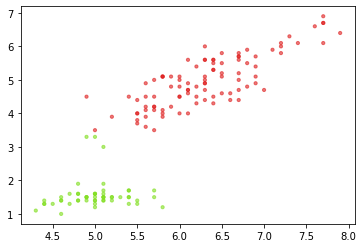

In [14]:
plt.scatter(dfKclusScores["Sepal Length"], dfKclusScores["Petal Length"], c=dfKclusScores.c, alpha = 0.6, s=10)

## 4) APPLY SAVED SCORING CODE TO A NEW INPUT DATA TABLE

In [15]:
s.dataStep.runCodeTable(
    casout={"caslib":"casuser","name":"scored_iris_clusters"},
    codeTable={"caslib":"casuser","name":"tmp_model_cas_table"},
    table={"caslib":"casuser","name":"iris"}
)

NOTE: Executing action 'dataStep.runCodeTable'.
NOTE: Action 'dataStep.runCodeTable' used (Total process time):
NOTE:       real time               0.025713 seconds
NOTE:       cpu time                0.104931 seconds (408.09%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            62.67G
NOTE:       memory                  14.16M (0.02%)


[InputCasTables]

                 casLib  Name  Rows  Columns                                        casTable
 0  CASUSER(viyademo01)  IRIS   150        6  CASTable('IRIS', caslib='CASUSER(viyademo01)')

[OutputCasTables]

                 casLib                  Name  Rows  Columns  Append Promoted                                           casTable
 0  CASUSER(viyademo01)  scored_iris_clusters   150        9     NaN        N  CASTable('scored_iris_clusters', caslib='CASUS...

+ Elapsed: 0.0257s, user: 0.0739s, sys: 0.0311s, mem: 14.2mb

In [16]:
# CASTable view on megacorp
tbl_kclus_scores2 = s.CASTable(caslib="casuser", name="scored_iris_clusters", replace=True)
dfKclusScores2 = tbl_kclus_scores2.to_frame()

In [17]:
dfKclusScores2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Index,_WARN_,_CLUSTER_ID_,_DISTANCE_
0,5.1,3.5,1.4,0.2,setosa,1.0,,2.0,0.250176
1,4.9,3.0,1.4,0.2,setosa,2.0,,2.0,0.418604
2,4.7,3.2,1.3,0.2,setosa,3.0,,2.0,0.442488
3,4.6,3.1,1.5,0.2,setosa,4.0,,2.0,0.494062
4,5.0,3.6,1.4,0.2,setosa,5.0,,2.0,0.302729


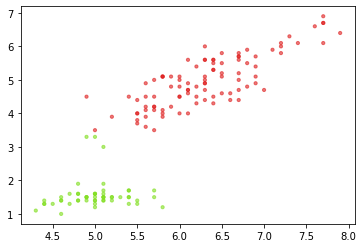

In [18]:
# define and map colors
colors = ['#DF2020', '#81DF20']
dfKclusScores2['c'] = dfKclusScores2._CLUSTER_ID_.map({1:colors[0], 2:colors[1]})
plt.scatter(dfKclusScores2["Sepal Length"], dfKclusScores2["Petal Length"], c=dfKclusScores2.c, alpha = 0.6, s=10)

In [19]:
s.close()